# 3. Final Product: Fortress Home Field

## Title: Fortress Home Field: The 12th Man is Real

## Description
This notebook generates the final infographics. We explored the massive impact of Home Field Advantage in College Football, specifically how it amplifies the success of Rush-Heavy teams and scales with crowd size.

## 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tidy data
df = pd.read_csv("tidy_team_games.csv")

# Re-apply play style logic
def get_play_style(pass_rate):
    if pass_rate < 0.40:
        return "Rush-Heavy"
    elif pass_rate > 0.60:
        return "Pass-Heavy"
    else:
        return "Balanced"

df['play_style'] = df['pass_rate'].apply(get_play_style)

## 2. Final Visualizations
We will create a combined infographic showing the power of Home Field.

/var/folders/lj/ms9kwfy108q1dhvklx64v16h0000gn/T/ipykernel_77137/3864544297.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_win_rates = df_att[df_att['is_home'] == True].groupby('attendance_bin')['win'].mean()
/var/folders/lj/ms9kwfy108q1dhvklx64v16h0000gn/T/ipykernel_77137/3864544297.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=home_stats.index, y=home_stats.values, palette=colors, ax=ax2)
/var/folders/lj/ms9kwfy108q1dhvklx64v16h0000gn/T/ipykernel_77137/3864544297.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

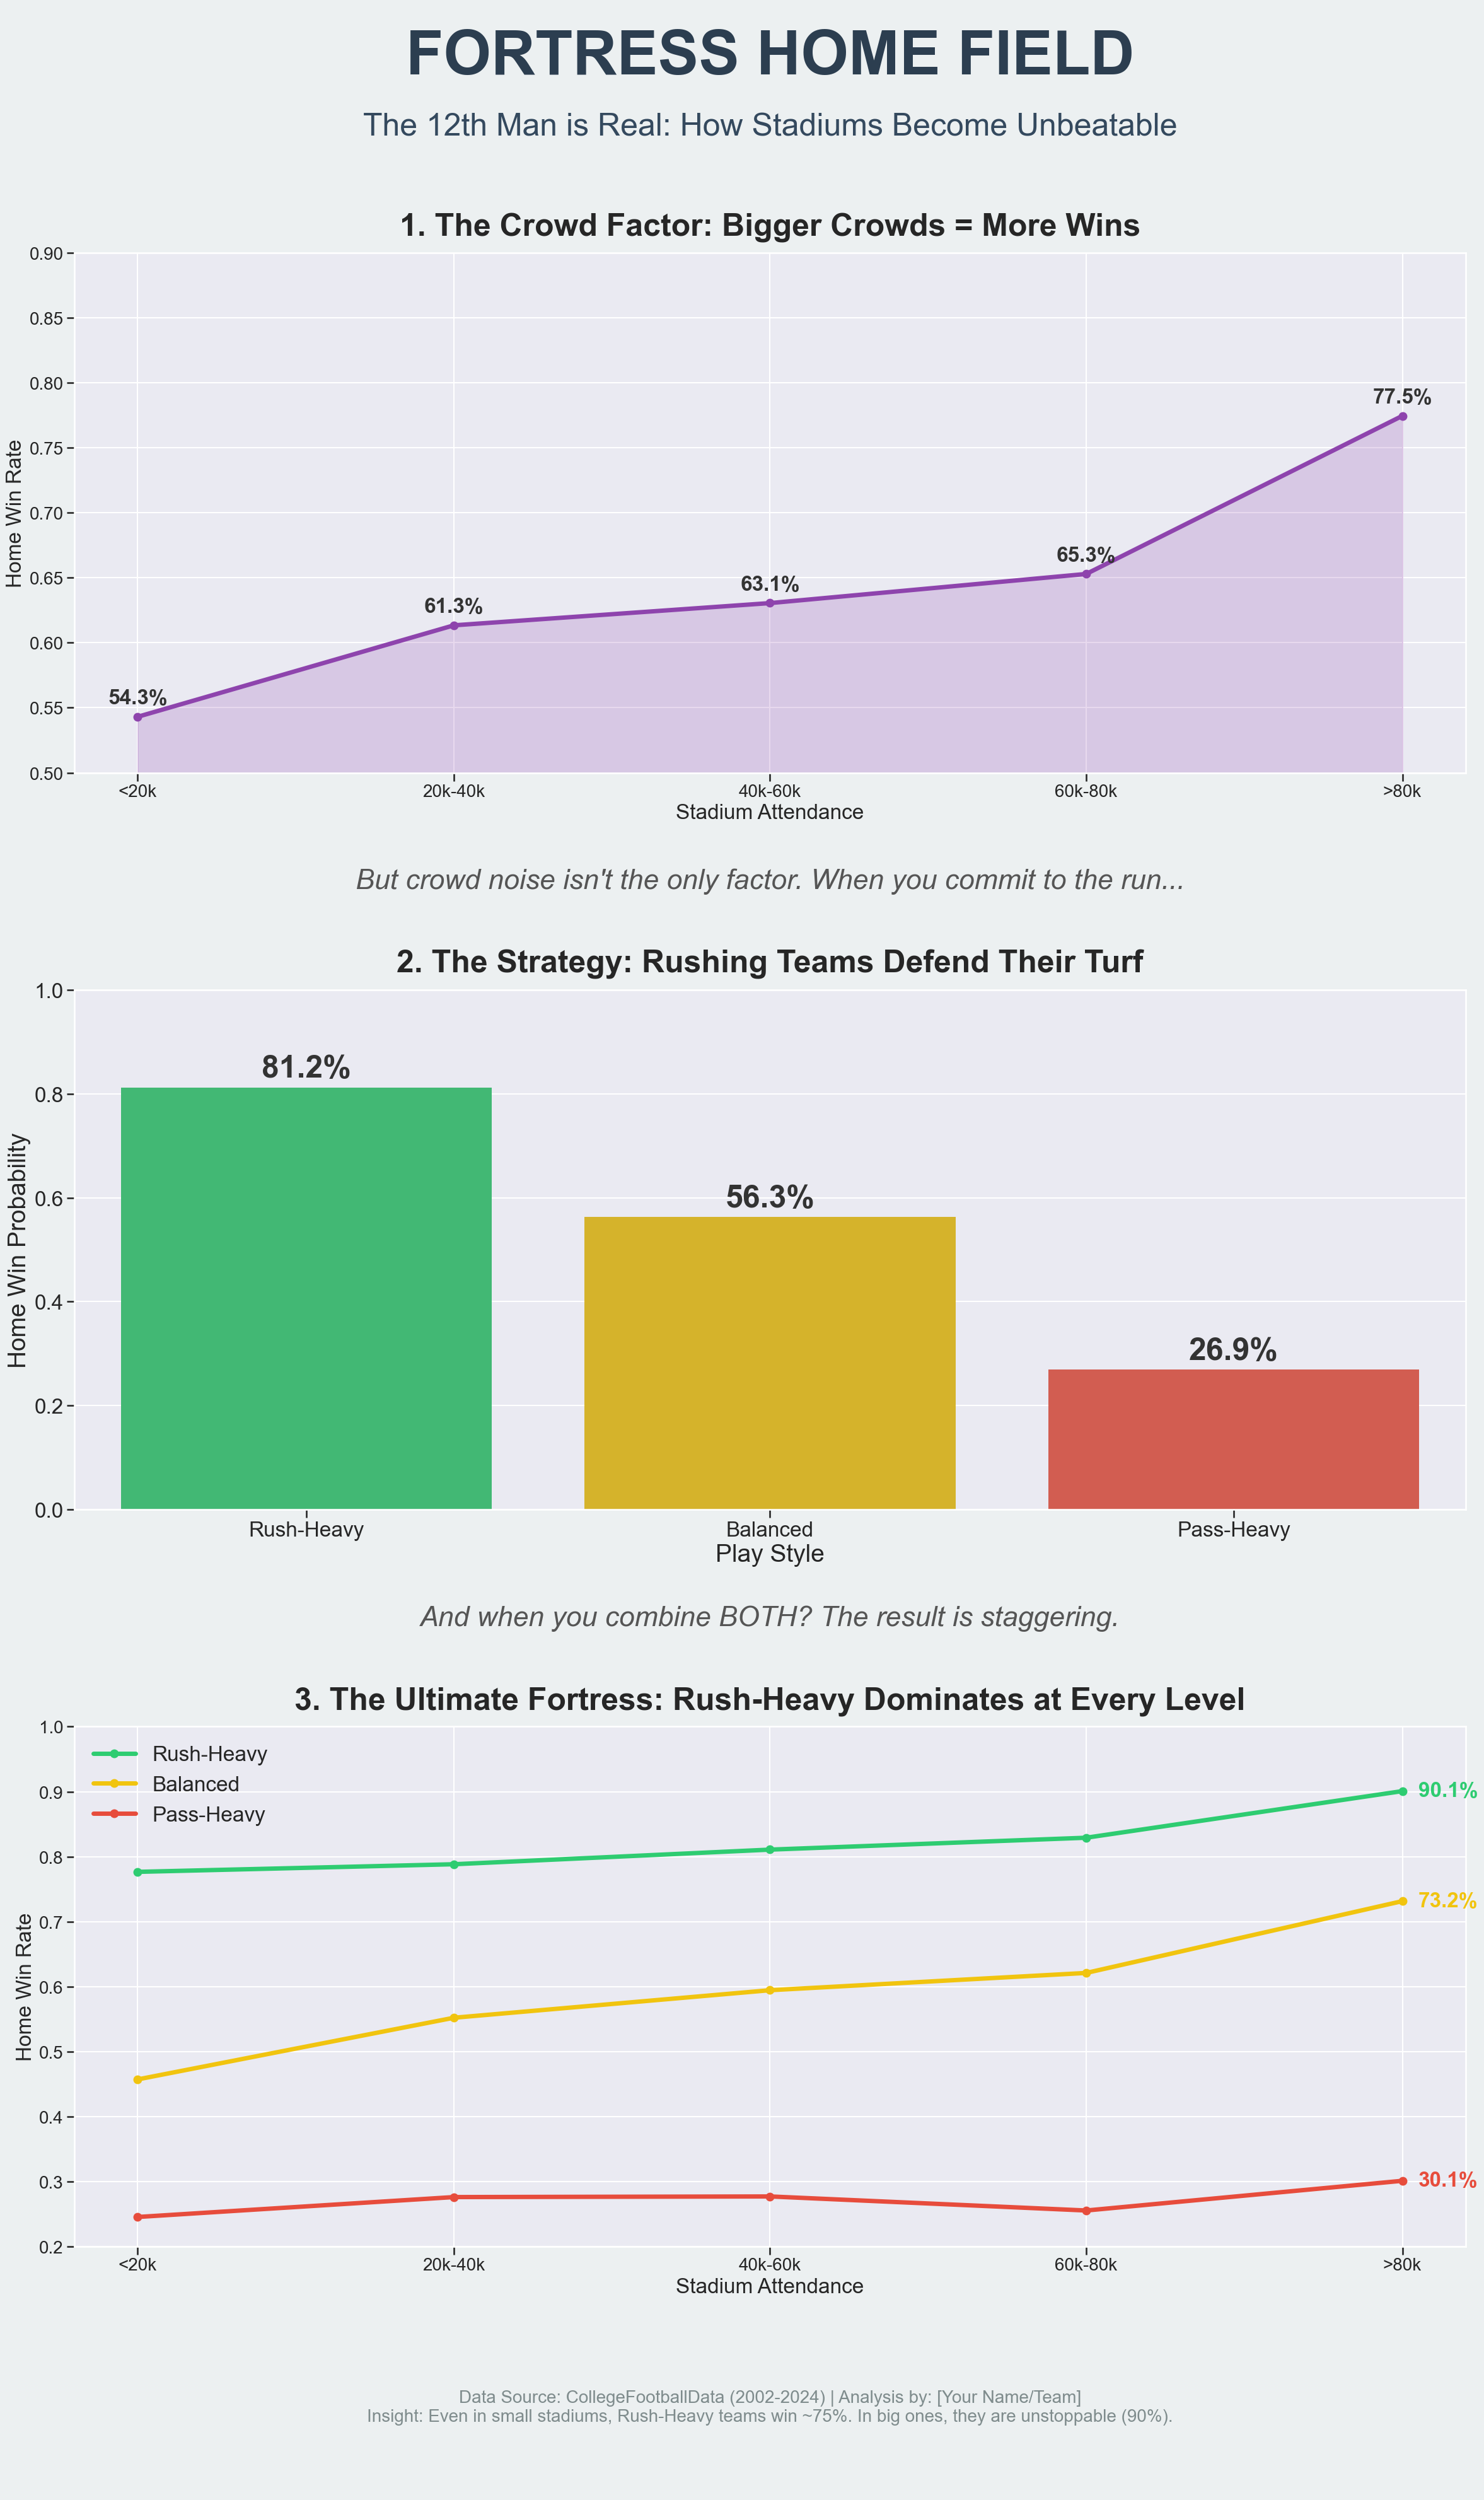

In [ ]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("talk")

# Create a figure with a custom layout (GridSpec)
fig = plt.figure(figsize=(24, 40), facecolor='#ecf0f1') # Increased height
gs = fig.add_gridspec(7, 1, height_ratios=[0.5, 1.5, 0.2, 1.5, 0.2, 1.5, 0.5])

# Title Section
ax_title = fig.add_subplot(gs[0])
ax_title.axis('off')
ax_title.text(0.5, 0.7, "FORTRESS HOME FIELD", ha='center', va='center', fontsize=70, weight='bold', color='#2c3e50')
ax_title.text(0.5, 0.3, "The 12th Man is Real: How Stadiums Become Unbeatable", ha='center', va='center', fontsize=36, color='#34495e')

# Plot 1: The Crowd Factor (Line Chart)
ax1 = fig.add_subplot(gs[1])
# Bin attendance
df_att = df[df['attendance'] > 0].copy()
df_att['attendance_bin'] = pd.cut(df_att['attendance'], 
                                  bins=[0, 20000, 40000, 60000, 80000, 120000], 
                                  labels=['<20k', '20k-40k', '40k-60k', '60k-80k', '>80k'])
att_win_rates = df_att[df_att['is_home'] == True].groupby('attendance_bin')['win'].mean()

ax1.plot(att_win_rates.index, att_win_rates.values, marker='o', linewidth=5, color='#8e44ad')
ax1.fill_between(att_win_rates.index, att_win_rates.values, alpha=0.2, color='#8e44ad')
ax1.set_title('1. The Crowd Factor: Bigger Crowds = More Wins', fontsize=36, weight='bold', pad=20)
ax1.set_xlabel('Stadium Attendance', fontsize=24)
ax1.set_ylabel('Home Win Rate', fontsize=24)
ax1.set_ylim(0.50, 0.90)
ax1.tick_params(axis='both', which='major', labelsize=20)
for i, v in enumerate(att_win_rates.values):
    ax1.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=24, weight='bold', color='#333')

# Annotation 1
ax_text1 = fig.add_subplot(gs[2])
ax_text1.axis('off')
ax_text1.text(0.5, 0.5, "But crowd noise isn't the only factor. When you commit to the run...", 
              ha='center', va='center', fontsize=32, style='italic', color='#555')

# Plot 2: Play Style (Grouped Bar)
ax2 = fig.add_subplot(gs[3])
home_stats = df[df['is_home'] == True].groupby('play_style')['win'].mean().reindex(['Rush-Heavy', 'Balanced', 'Pass-Heavy'])
colors = ['#2ecc71', '#f1c40f', '#e74c3c']
bars = sns.barplot(x=home_stats.index, y=home_stats.values, palette=colors, ax=ax2)
ax2.set_title('2. The Strategy: Rushing Teams Defend Their Turf', fontsize=36, weight='bold', pad=20)
ax2.set_xlabel('Play Style', fontsize=28)
ax2.set_ylabel('Home Win Probability', fontsize=28)
ax2.set_ylim(0, 1.0)
ax2.tick_params(axis='both', which='major', labelsize=24)
for i, v in enumerate(home_stats.values):
    ax2.text(i, v + 0.02, f"{v:.1%}", ha='center', fontsize=36, weight='bold', color='#333')

# Annotation 2
ax_text2 = fig.add_subplot(gs[4])
ax_text2.axis('off')
ax_text2.text(0.5, 0.5, "And when you combine BOTH? The result is staggering.", 
              ha='center', va='center', fontsize=32, style='italic', color='#555')

# Plot 3: The Ultimate Fortress (Line Chart - All Styles by Attendance)
ax3 = fig.add_subplot(gs[5])

# Calculate win rates for all styles by attendance
style_att_wins = df_att[df_att['is_home'] == True].groupby(['attendance_bin', 'play_style'])['win'].mean().unstack()

# Define styles and colors (matching Plot 2)
styles = ['Rush-Heavy', 'Balanced', 'Pass-Heavy']
colors = {'Rush-Heavy': '#2ecc71', 'Balanced': '#f1c40f', 'Pass-Heavy': '#e74c3c'}

# Plot each line
for style in styles:
    if style in style_att_wins.columns:
        data = style_att_wins[style]
        ax3.plot(data.index, data.values, marker='o', linewidth=5, color=colors[style], label=style)
        # Label the last point
        last_val = data.values[-1]
        ax3.text(4.05, last_val, f"{last_val:.1%}", ha='left', va='center', fontsize=24, weight='bold', color=colors[style])

ax3.set_title('3. The Ultimate Fortress: Rush-Heavy Dominates at Every Level', fontsize=36, weight='bold', pad=20)
ax3.set_xlabel('Stadium Attendance', fontsize=24)
ax3.set_ylabel('Home Win Rate', fontsize=24)
ax3.set_ylim(0.2, 1.0) 
ax3.tick_params(axis='both', which='major', labelsize=20)
ax3.legend(fontsize=24, loc='upper left')

# Footer
ax_footer = fig.add_subplot(gs[6])
ax_footer.axis('off')
ax_footer.text(0.5, 0.5, "Data Source: CollegeFootballData (2002-2024) | Analysis by:Zach Eklund\nInsight: Even in small stadiums, Rush-Heavy teams win ~75%. In big ones, they are unstoppable (90%).", 
               ha='center', va='center', fontsize=20, color='#7f8c8d')

plt.tight_layout()
plt.savefig('infographic.png', dpi=150, bbox_inches='tight')
plt.savefig('infographic.svg', bbox_inches='tight')
plt.show()

## 3. Manifest of Resources
| Resource | Description | Link/Location |
| --- | --- | --- |
| Data Source | College Football Box Scores (2002-2024) | `cfb_box-scores_2002-2024 (1).csv` |
| Notebook 1 | Data Acquisition & Cleaning | `1_Acquire_Data.ipynb` |
| Notebook 2 | Exploratory Analysis | `2_Explore_Data.ipynb` |
| Notebook 3 | Final Product Generation | `3_Final_Product.ipynb` |
| Infographic (PNG) | Final Poster | `infographic.png` |
| Infographic (SVG) | Final Poster | `infographic.svg` |